In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import numpy as np
from IPython.display import Image

In [2]:
# Load datast
dataset = pd.read_csv("F:/ML/Git ML/BreastCancerDetection/wisc_bc_data.csv")


In [3]:
#data PreProcessing
dataset2 = dataset.drop(columns="id")
df = dataset2.drop(columns="diagnosis")
df1 = (df-df.min())/(df.max()-df.min()) #normalizing 
#dependent variable
df2 = pd.DataFrame(dataset.loc[:,"diagnosis"])
# Binarize the output
df2 = label_binarize(df2, classes=["B", "M"])
n_classes = df2.shape[1]

print (df2.shape)

(569, 1)


In [11]:
#define KNN in terms of test size & neighbours so that it can be called upon later
def knnclass(i,j):
    #split dataset into training and validation
    X_train, X_validation, Y_train, Y_validation = train_test_split(df1, df2, test_size=i, random_state=7)
    classifier = KNeighborsClassifier(n_neighbors = j)
    classifier.fit(X_train, Y_train.ravel())
    # prediction
    y_predict = classifier.predict(X_validation)
    return (round((accuracy_score(Y_validation,y_predict)),3))
    #return (y_predict)

In [12]:
#to generate the dataframe that has all the possible combination of testsize and neighbours
import time
analysisdf = pd.DataFrame(columns= ["testsize","neighbours","accuracy"])
i = 0.05
l = 0
while i <= 0.50:
    for j in range (2,51):
        analysisdf.loc[l,"testsize"]= i
        analysisdf.loc[l,"neighbours"]= j
        analysisdf.loc[l,"accuracy"]= knnclass(i,j)
        l += 1
    i += 0.01    

analysisdf.head()
#incase you want to print to a local file
#analysisdf.to_csv("trial.csv")


     testsize neighbours accuracy
0        0.05          2    0.931
1        0.05          3    0.931
2        0.05          4    0.931
3        0.05          5    0.931
4        0.05          6    0.931
5        0.05          7    0.931
6        0.05          8    0.931
7        0.05          9    0.931
8        0.05         10    0.931
9        0.05         11    0.931
10       0.05         12    0.931
11       0.05         13    0.931
12       0.05         14    0.931
13       0.05         15    0.931
14       0.05         16    0.897
15       0.05         17    0.931
16       0.05         18    0.897
17       0.05         19    0.897
18       0.05         20    0.897
19       0.05         21    0.897
20       0.05         22    0.897
21       0.05         23    0.897
22       0.05         24    0.897
23       0.05         25    0.897
24       0.05         26    0.897
25       0.05         27    0.897
26       0.05         28    0.897
27       0.05         29    0.897
28       0.05 

In [15]:
#to get the ideal combination of the above which gives the maximum accuracy
best = analysisdf['accuracy'].max()
opti = analysisdf[analysisdf['accuracy'] == best ]
opti

,testsize,neighbours,accuracy
1915,0.44,6,0.976


In [16]:
#neighbors and testsize to get the acccuracy max
rownumber= analysisdf[analysisdf['accuracy']== best].index.item()
tsgood= analysisdf.loc[rownumber,"testsize"]
nbrsgood= analysisdf.loc[rownumber,"neighbours"]

In [17]:
#Analyis of data by using confusion matrix & Roc Curve
#split dataset into training and validation
X_train, X_validation, Y_train, Y_validation = train_test_split(df1, df2, test_size=tsgood, random_state=7)
classifier = KNeighborsClassifier(n_neighbors = nbrsgood)
classifier.fit(X_train, Y_train.ravel()) 
# prediction
y_predict = classifier.predict(X_validation)
# data for roc curve 
fpr, tpr, thresholds = roc_curve(Y_validation, y_predict, pos_label=1)
print (confusion_matrix(Y_validation,y_predict))


[[159   1]
 [  5  86]]


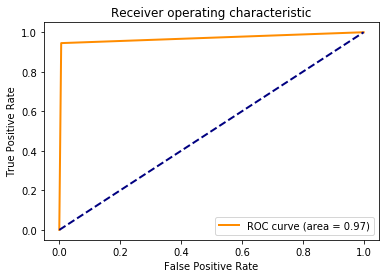

In [18]:
#Plotting the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Types of ROC curve
![Image](https://sonoworld.com/images/FetusItemImages/article-images/Technique/ROC_curves/4.jpg)

Comparing both the graphs we can safely assume that the model is close to an excellent model